<a href="https://colab.research.google.com/github/pthkbs123/SkillTreePython-DataAnalysis/blob/main/02.%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94/ch02_09_Seaborn%EC%8B%A4%EC%8A%B5_tip%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.09. Seborn 실습 - tip 데이터


---

* 날짜: 2022-04-21
* 이름: 박태현


## 학습내용

    - Catplot을 이용해 범주별 데이터의 분포를 시각화 한다.
    - Catplot의 다양한 시각화 종류를 알아본다.

```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Set2')
```


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Set2')


## **실습**
---



### (1) 데이터 기본 탐색

#### | 데이터 준비

```
tips = sns.load_dataset('tips')
tips.head()
```

In [5]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### | 데이터 기본 탐색


In [6]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [7]:
tips.day.unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

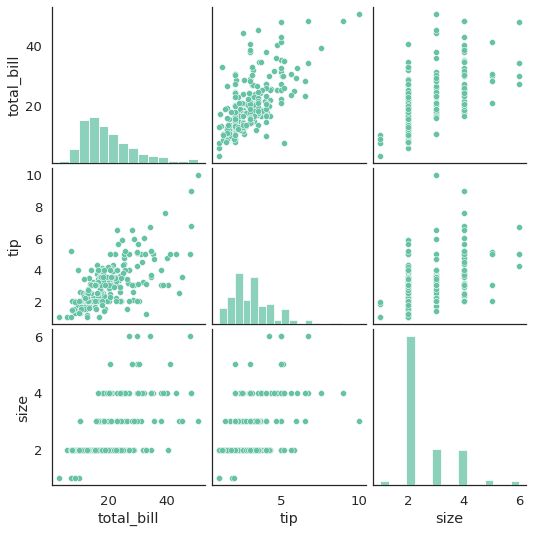

In [10]:
sns.pairplot(tips, )

### (2) Categorical plot

![](https://seaborn.pydata.org/_images/function_overview_8_0.png)

```
seaborn.catplot(x=None, y=None, 
                hue=None, data=None,
                kind = 'strip' # {swarm, box, violin, boxen, point, bar, count} 
                row=None, col=None, 
                col_wrap=None, 
                units=None, seed=None, order=None,
                hue_order=None, row_order=None, 
                col_order=None, height=5, 
                aspect=1, orient=None, color=None, 
                palette=None, legend=True, 
                legend_out=True, 
                sharex=True, sharey=True, 
                margin_titles=False,
                facet_kws=None,
                jitter=True)

```

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


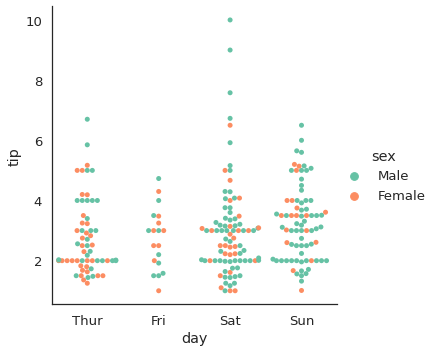

In [14]:
sns.catplot(data = tips, x = 'day', y = 'tip',
            kind = 'swarm', # strip이 기본
            hue = 'sex'
            )

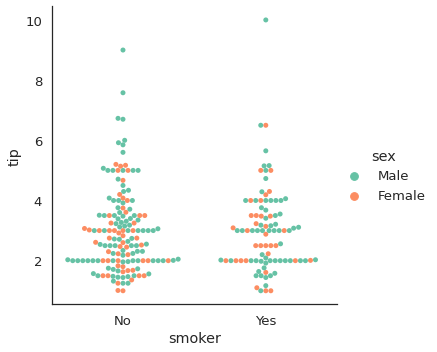

In [19]:
# 흡연 여부에따라 팁의 분포 그리기

sns.catplot(data = tips, x = 'smoker', y = 'tip',
            kind = 'swarm', 
            hue = 'sex', 
            order = ['No', 'Yes'] # x 카테고리의 순서 정할 수 있음
            )

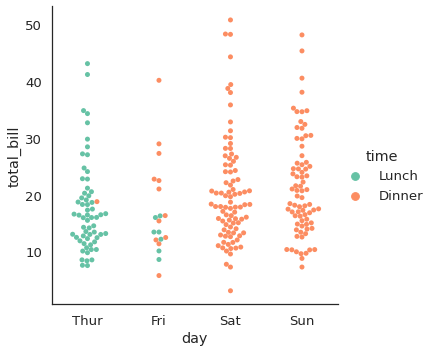

In [22]:
# 요일 별로 total_bill + 시간별 색깔

sns.catplot(data = tips, x = 'day', y = 'total_bill', hue = 'time', 
            kind = 'swarm')

#### | 플롯 분할



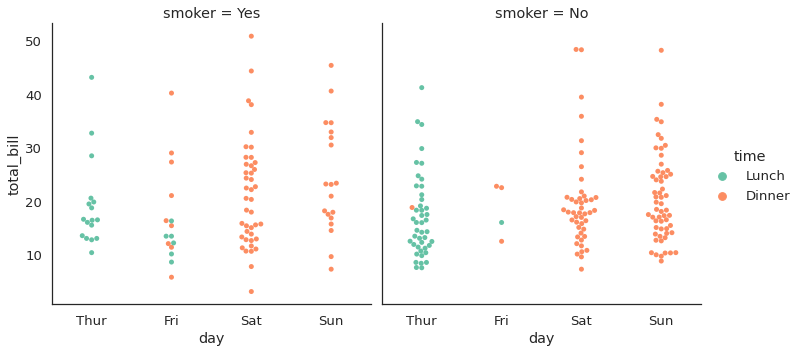

In [23]:
sns.catplot(data = tips, x = 'day', y = 'total_bill', hue = 'time', 
            kind = 'swarm', 
            col = 'smoker'
            )

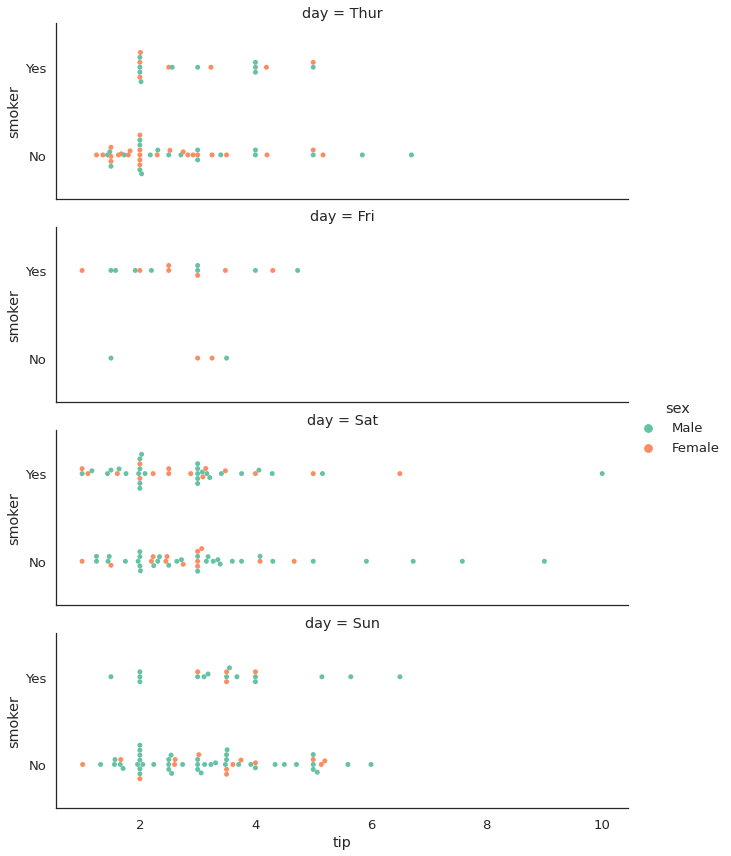

In [28]:
# 수평 플롯 x = 흡연 여부 y = tip
sns.catplot(data = tips, x = 'tip', y = 'smoker', 
            kind = 'swarm',
            row = 'day',
            hue = 'sex',
            height = 3,
            aspect = 3,
            )

### (3) 범주별 통계 시각화



#### | Bar plots


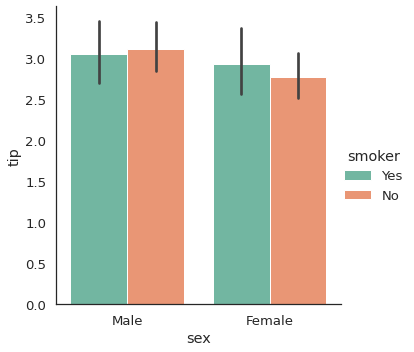

In [29]:
sns.catplot(data = tips, x = 'sex', y = 'tip', 
            kind = 'bar',
            hue = 'smoker'
            )

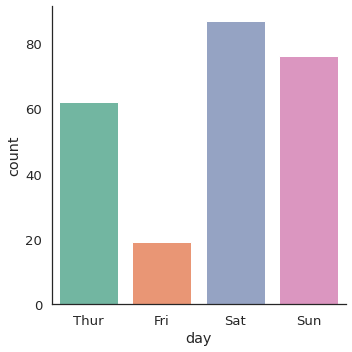

In [35]:
sns.catplot(data = tips, x = 'day', kind = 'count', # 날짜 별 카운팅
            )

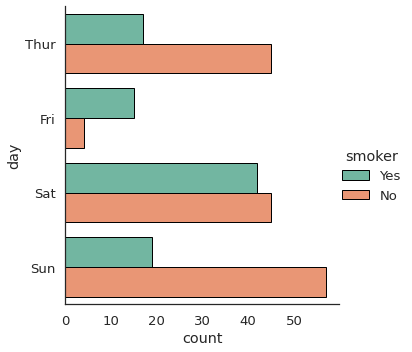

In [36]:
sns.catplot(data = tips, y = 'day', kind = 'count', # 날짜 별 카운팅, 수평으로 
            hue = 'smoker',
            edgecolor = 'k'
            # 카운트플롯을 쓸 때 2개의 축을 지정하면 오류 발생.
            )

#### | Point plots



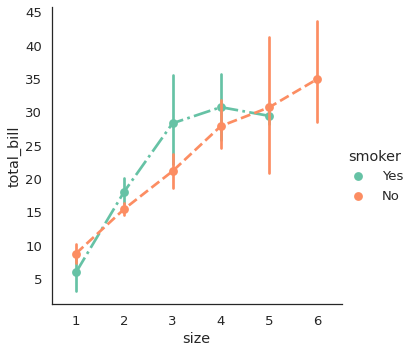

In [44]:
sns.catplot(data = tips, x = 'size', y = 'total_bill',
            hue = 'smoker',
            kind = 'point',
            linestyles = ['-.', '--'],
            markes = ['o', '*']
            )

### (4) 범주별 분포 시각화


#### | Box plots


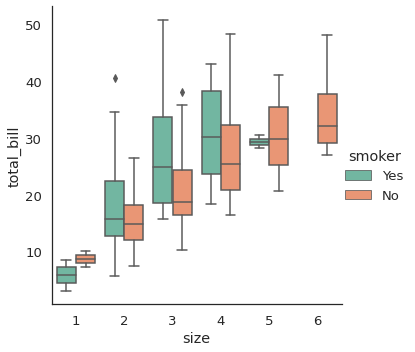

In [47]:
sns.catplot(data = tips, x = 'size', y = 'total_bill',
            hue = 'smoker',
            kind = 'box',
            )

#### | Violin plots

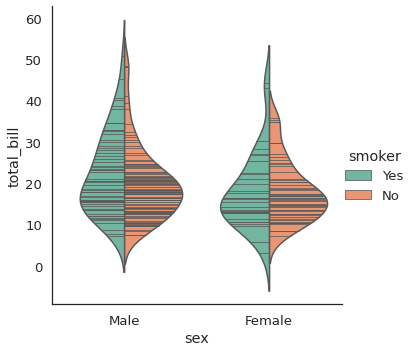

In [54]:
sns.catplot(data = tips, x = 'sex', y = 'total_bill',
            hue = 'smoker',
            kind = 'violin',
            inner = 'stick',
            split = True,
            )

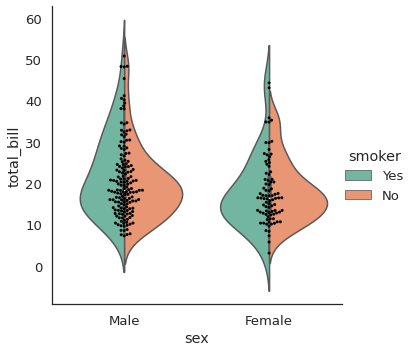

In [58]:
g = sns.catplot(data = tips, x = 'sex', y = 'total_bill',
            hue = 'smoker',
            kind = 'violin',
            split = True,
            )

sns.swarmplot(data = tips, x = 'sex', y = 'total_bill', ax = g.ax,
              color = 'k', size = 3)


## **과제: [Titanic - Machine Learning from Disaster](https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris/notebook)**

---

![](https://storage.googleapis.com/kaggle-media/welcome/video_thumbnail.jpg)



### (1) 데이터 기본 탐색


#### | 데이터 준비

```
df = sns.load_dataset('titanic')
df.head()
```

In [79]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### | 데이터 기본 탐색


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [82]:
df['embarked'] = df['embarked'].fillna('S')
df['age'] = df['age'].fillna(df['age'].median())
df = df.dropna(axis = 1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alive       891 non-null    object  
 12  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 72.5+ KB


### (2) Categorical plot


In [85]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,yes,True


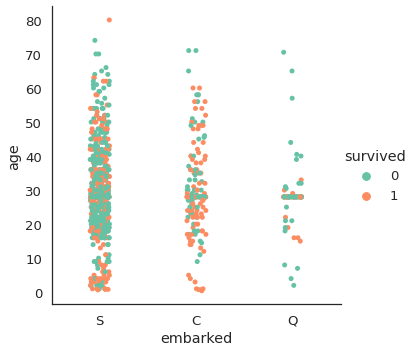

In [99]:
sns.catplot(data = df, x = 'embarked', y = 'age', 
            hue = 'survived'
            )

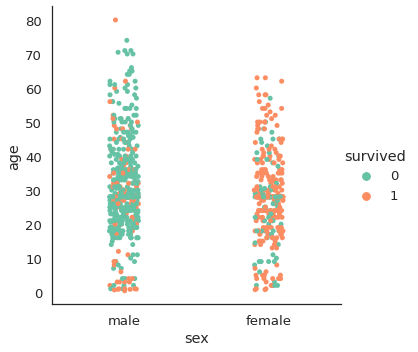

In [100]:
sns.catplot(data = df, x = 'sex', y = 'age', 
            hue = 'survived'
            )

#### | 플롯 분할


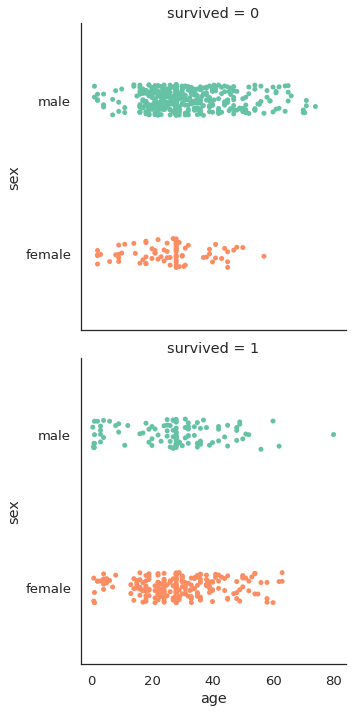

In [103]:
sns.catplot(data = df, x = 'age', y = 'sex', 
            row = 'survived',
            )

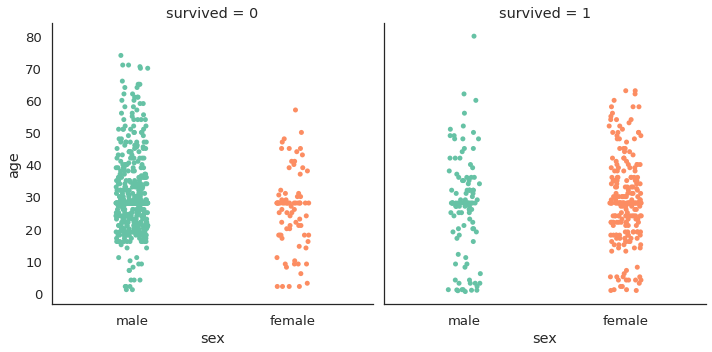

In [102]:
sns.catplot(data = df, x = 'sex', y = 'age', 
            col = 'survived',
            )

### (3) 범주별 통계 시각화


#### | Bar plots

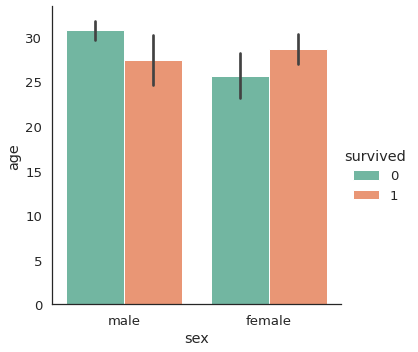

In [105]:
sns.catplot(data = df, x = 'sex', y = 'age', 
            kind = 'bar',
            hue = 'survived'
            )

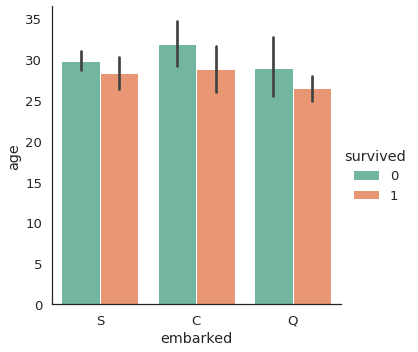

In [106]:
sns.catplot(data = df, x = 'embarked', y = 'age', 
            kind = 'bar',
            hue = 'survived'
            )

#### | Point plots



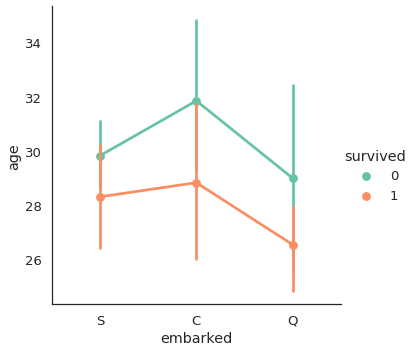

In [111]:
sns.catplot(data = df, x = 'embarked', y = 'age', 
            kind = 'point',
            hue = 'survived'
            )

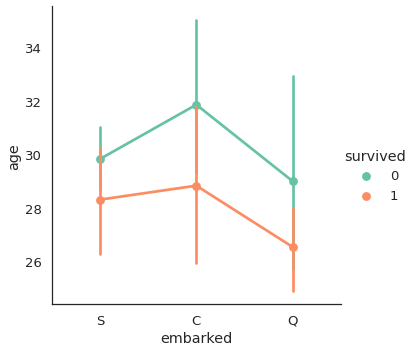

In [115]:
sns.catplot(data = df, x = 'embarked', y = 'age', 
            kind = 'point',
            hue = 'survived',
            linestyle = ['-.', '--'],
            alpha = .5,
            )

### (4) 범주별 분포 시각화


#### | Box plots


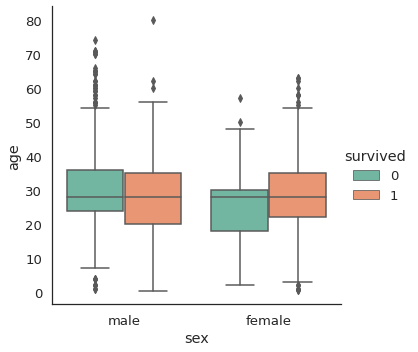

In [117]:
sns.catplot(data = df, x = 'sex', y = 'age', 
            kind = 'box',
            hue = 'survived'
            )

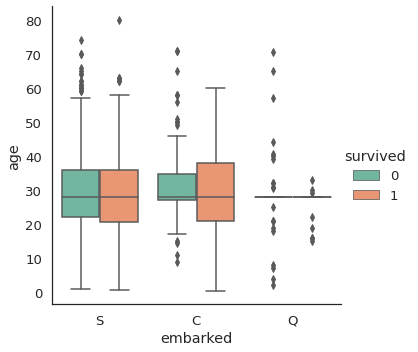

In [120]:
sns.catplot(data = df, x = 'embarked', y = 'age', 
            kind = 'box',
            hue = 'survived'
            )

#### | Violin plots

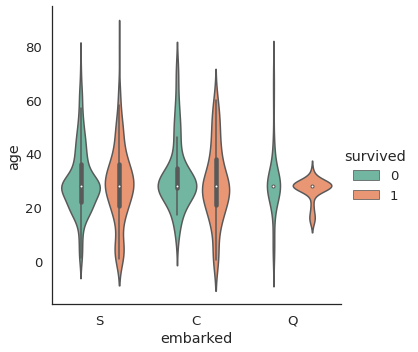

In [121]:
sns.catplot(data = df, x = 'embarked', y = 'age', 
            kind = 'violin',
            hue = 'survived'
            )

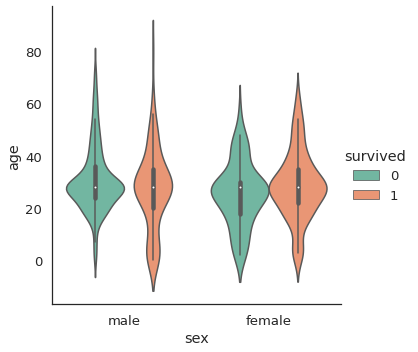

In [124]:
sns.catplot(data = df, x = 'sex', y = 'age', 
            kind = 'violin',
            hue = 'survived'
            )